In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [38]:
import pickle
with open('data1.pkl', 'rb') as f:
    records = pickle.load(f)

In [48]:
records

[['Mobile', 'Mobile_Cover', 'Mobile_Charger'],
 ['Mobile', 'Earphones', 'Screen'],
 ['PC', 'PC_bag', 'Mouse', 'PC_desk'],
 ['HDD', 'Mobile_Charger', 'Earphones'],
 ['Mobile', 'Mobile_Cover', 'Screen'],
 ['PC', 'HDD'],
 ['PC_desk', 'Mouse', 'Mobile_Charger'],
 ['Mobile', 'Mobile_Cover'],
 ['PC', 'PC_bag'],
 ['Mobile_Cover', 'Screen'],
 ['Mobile', 'Earphones', 'Screen'],
 ['PC', 'Mouse'],
 ['PC', 'Mobile', 'Mobile_Charger'],
 ['Mobile', 'PC'],
 ['HDD', 'Earphones'],
 ['PC', 'Screen'],
 ['Mobile', 'PC', 'PC_bag'],
 ['Mobile', 'Earphones'],
 ['Mobile', 'HDD'],
 ['PC_bag', 'Mouse']]

In [49]:
l_records = len(records)
records1 = records[:int(l_records*0.25)].copy()
records2 = records[:int(l_records*0.5)].copy()
records3 = records[:int(l_records*0.75)].copy()
records4 = records[:].copy()

### Applying Apriori

In [50]:
import time
def record_timing(records):
    start_time = time.time()
    association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=0, min_length=2)
    association_results = list(association_rules)
    return time.time()-start_time

In [51]:
percentile_time = [record_timing(records1),
                   record_timing(records2),
                   record_timing(records3),
                   record_timing(records4)]
print(percentile_time)

[0.0009987354278564453, 0.0009996891021728516, 0.001001596450805664, 0.0009989738464355469]


In [52]:
np.mean([4.0578, 4.0343, 4.0626, 4.0378])/np.mean(percentile_time)

4049.1425219102125

In [53]:
brute_time = [4.0578, 4.0343, 4.0626, 4.0378]
brute_time = [i*0.1 for i in brute_time]

Text(0.5, 0, 'dataset percentile')

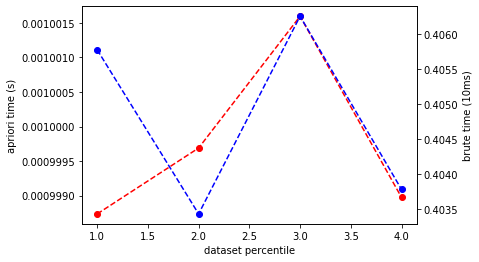

In [54]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
plt.plot(np.arange(1, 5), percentile_time, marker='o', linestyle='--', color='r', label='Square')
plt.ylabel('apriori time (s)')
plt.xlabel('dataset percentile')
# plt.title("brute-apriori plot")

plt.twinx()
plt.plot(np.arange(1, 5), brute_time, marker='o', linestyle='--', color='b', label='Square')
plt.ylabel('brute time (10ms)')
plt.xlabel('dataset percentile')
         
# plt.plot(np.arange(1, 5), percentile_time, marker='o', linestyle='--', color='r', label='Square')
# plt.plot(np.arange(1, 5), brute_time, marker='o', linestyle='--', color='b', label='Square')
# plt.xlabel('datatset percentile (%)')
# plt.ylabel('time slapsed (s)')

In [25]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=0, min_length=2)
association_results = list(association_rules)

In [78]:
association_results[0]

RelationRecord(items=frozenset({'Earphones'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Earphones'}), confidence=0.25, lift=1.0)])

In [79]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print(items)
#     print("Rule: " + items[0] + " -> " + items[1])

#     #second index of the inner list
#     print("Support: " + str(item[1]))

#     #third index of the list located at 0th
#     #of the third index of the inner list

#     print("Confidence: " + str(item[2][0][2]))
#     print("Lift: " + str(item[2][0][3]))
#     print("=====================================")

['Earphones']
['HDD']
['Mobile']
['Mobile_Charger']
['Mobile_Cover']
['Mouse']
['PC']
['PC_bag']
['Screen']
['Earphones', 'HDD']
['Earphones', 'Mobile']
['Earphones', 'Mobile_Charger']
['Earphones', 'Screen']
['HDD', 'Mobile']
['Mobile_Charger', 'HDD']
['HDD', 'PC']
['Mobile_Charger', 'Mobile']
['Mobile_Cover', 'Mobile']
['Mobile', 'PC']
['Mobile', 'PC_bag']
['Mobile', 'Screen']
['Mobile_Charger', 'Mobile_Cover']
['Mobile_Charger', 'Mouse']
['Mobile_Charger', 'PC']
['Mobile_Charger', 'PC_desk']
['Mobile_Cover', 'Screen']
['PC', 'Mouse']
['PC_bag', 'Mouse']
['PC_desk', 'Mouse']
['PC_bag', 'PC']
['PC_desk', 'PC']
['Screen', 'PC']
['PC_desk', 'PC_bag']
['Earphones', 'HDD', 'Mobile_Charger']
['Earphones', 'Mobile', 'Screen']
['Mobile_Charger', 'Mobile_Cover', 'Mobile']
['Mobile_Charger', 'Mobile', 'PC']
['Mobile_Cover', 'Mobile', 'Screen']
['PC_bag', 'Mobile', 'PC']
['Mobile_Charger', 'PC_desk', 'Mouse']
['PC_bag', 'PC', 'Mouse']
['PC_desk', 'PC', 'Mouse']
['PC_bag', 'PC_desk', 'Mouse']
['